In [6]:
import sys,os,glob
from astropy.io import fits
from astropy.table import Table
from astropy.nddata import extract_array
from astropy.coordinates import SkyCoord
from astropy import wcs
from astropy.wcs.utils import skycoord_to_pixel
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.mast import Observations
from astropy.visualization import (simple_norm,LinearStretch)

import st_phot

1273.8517443452038 1098.4726916621225


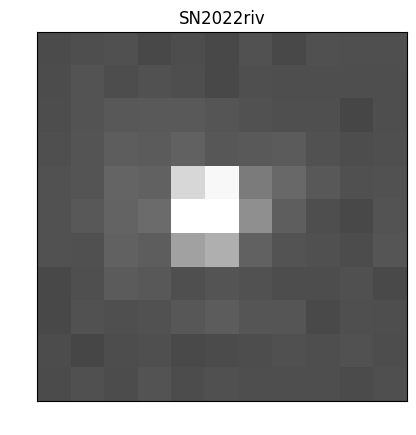

In [11]:
file='jw02767002001_02103_00003_nrcb3_cal.chip1.fits'
sn_location = SkyCoord('21:29:40.21','+0:05:24.158',unit=(u.hourangle,u.deg))

ref_image = file
ref_fits = fits.open(ref_image)
ref_data = fits.open(ref_image)['SCI',1].data
ref_x,ref_y = skycoord_to_pixel(sn_location,wcs.WCS(ref_fits['SCI',1],ref_fits))
print(ref_x,ref_y)
ref_cutout = extract_array(ref_data,(11,11),(ref_y,ref_x))#swap x and y, extract_array likes it like this
plt.imshow(ref_cutout, origin='lower',
vmin=0,vmax=1000,cmap='gray')
plt.title('SN2022riv')
plt.gca().tick_params(labelcolor='none',axis='both',color='none')
plt.show()

(6, 24)
6
-0.23825565479614852


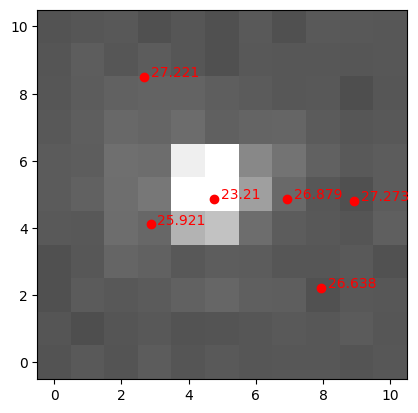

In [16]:
data=np.loadtxt('2022riv_f150w.phot')
#2nd column x,3rd column y
#15th column magnitude
data_new=data[np.where((data[:,2]<ref_x+5)&(data[:,2]>ref_x-5)&(data[:,3]>ref_y-5)&(data[:,3]<ref_y+5))]
print(np.shape(data_new))
plt.imshow(ref_cutout, origin='lower',vmin=0,vmax=900,cmap='gray')
print(len(data_new))
for i in range(len(data_new)):
    plt.text(ref_x-data_new[i,2]+5.2,ref_y-data_new[i,3]+5,'{}'.format(data_new[i,15]),color='r')
    plt.scatter(ref_x-data_new[i,2]+5,ref_y-data_new[i,3]+5,color='r')
plt.legend
